In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

import cifar_helper

cifar = cifar_helper.CIFAR("./cifar_10_batches_py/")

(12, 32, 32, 3)
(12, 32, 32, 3)


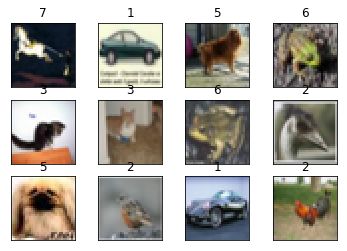

In [19]:
images, label = next(cifar.get_training_batch(12))
print(np.shape(images))
print(np.shape(images))

# @TODO labels anzeigen
fig, axes = plt.subplots(3, 4)
for i, ax in enumerate(np.reshape(axes, [-1])):
    ax.imshow(images[i])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(label[i])

In order to get an idea of the complexity of the network structure, think about the following two questions: How many neurons are simulated? 

There are 16*32*32 + 16*16*16 + 32*16*16 + 32*8*8 + 512 + 10 = 31242 Neurons.

How many degrees of freedom (weights) does the network have? 

16*5*5*3 + 16 + 32*3*3*16 + 32*8*8*512 + 32*8*8 + 512 * 10 + 10

Of many ﬂoating-point operations are necessary for a forward pass of the network? (Write down your answer!)

In [ ]:
# size of our minibatch, the amount of samples we train on in each training instance
minibatch_size = 12

kernelsize_l1 = 5
kernelsize_l3 = 3

# defining input x as placeholder
x = tf.placeholder(tf.float32, shape=(minibatch_size, 32, 32, 3))

# LAYER ONE
# defining kernel of layer 1
kernel_l1 = tf.Variable(tf.truncated_normal(shape=(kernelsize_l1, kernelsize_l1, 3, 16), stddev=0.1))

# apply 1st layer convolution
featuremap_l1 = tf.nn.conv2d(x, kernel_l1, strides=[1, 1, 1, 1], padding="SAME")

# define bias layer one
bias_l1 = tf.Variable(tf.truncated_normal(shape=(32, 32, 16), stddev=0.1))

# Calculate neuron outputs by applying the activation function
activation_l1 = tf.nn.tanh(featuremap_l1 + bias_l1)

# LAYER TWO
# apply max pooling to outputs
pooling_l2 = tf.nn.max_pool(activation_l1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")

# LAYER THREE
# defining kernel of layer 3
kernel_l3 = tf.Variable(tf.truncated_normal(shape=(kernelsize_l3, kernelsize_l3, 16, 32), stddev=0.1))

# apply 3rd layer convolution
featuremap_l3 = tf.nn.conv2d(pooling_l2, kernel_l3, strides=[1, 1, 1, 1], padding="SAME")

# define bias layer three
bias_l3 = tf.Variable(tf.truncated_normal(shape=(16, 16, 32), stddev=0.1))

# Calculate neuron outputs by applying the activation function
activation_l3 = tf.nn.tanh(featuremap_l3 + bias_l3)

# LAYER FOUR
# apply max pooling to outputs
pooling_l4 = tf.nn.max_pool(activation_l3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")

# LAYER FIVE
# we reshape the feature maps 
reshape_l4 = tf.reshape(pooling_l4, (minibatch_size, 8*8*32))

